<a href="https://colab.research.google.com/github/SanjayN-ai/Breast-Cancer/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.09G/3.10G [00:25<00:00, 158MB/s]
100% 3.10G/3.10G [00:25<00:00, 132MB/s]


In [5]:
!unzip -q breast-histopathology-images.zip -d breast_cancer_data


In [20]:
import os
import shutil

# Create folders for organized data
os.makedirs("data/0", exist_ok=True)
os.makedirs("data/1", exist_ok=True)

# Root directory where original folders are stored
root_dir = "breast_cancer_data"

# Walk through all subfolders and copy images to new folders
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".png"):
            label = file.split("_")[-1].replace(".png", "")  # class0 or class1
            if label == "class0":
                shutil.copy(os.path.join(subdir, file), "data/0/" + file)
            elif label == "class1":
                shutil.copy(os.path.join(subdir, file), "data/1/" + file)

print("✅ Dataset organized into 'data/0' (benign) and 'data/1' (malignant)")


✅ Dataset organized into 'data/0' (benign) and 'data/1' (malignant)


In [21]:
DATASET_PATH = "data"


In [22]:
import os

benign_count = len(os.listdir('data/0'))
malignant_count = len(os.listdir('data/1'))

print(f"Benign images: {benign_count}")
print(f"Malignant images: {malignant_count}")


Benign images: 36511
Malignant images: 11912


In [24]:
import os
import shutil

# Make sure destination folders exist
os.makedirs("data/0", exist_ok=True)
os.makedirs("data/1", exist_ok=True)

root_dir = "breast_cancer_data"

count0, count1 = 0, 0

for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith(".png"):
            class_label = filename.split("_")[-1].replace(".png", "")  # class0 or class1
            src_path = os.path.join(dirpath, filename)
            if class_label == "class0":
                shutil.copy(src_path, f"data/0/{filename}")
                count0 += 1
            elif class_label == "class1":
                shutil.copy(src_path, f"data/1/{filename}")
                count1 += 1

print(f"✅ Copied {count0} benign images and {count1} malignant images.")


✅ Copied 36511 benign images and 11912 malignant images.


In [25]:
import os

# Sample 10 image file names from any subfolder
for root, dirs, files in os.walk("breast_cancer_data"):
    for file in files[:10]:  # print only 10 files
        print(file)
    break


In [26]:
X, y = load_images(DATASET_PATH)
X = X.astype('float32') / 255.0
y = to_categorical(y, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Loaded {len(X)} images")


✅ Loaded 48422 images


In [27]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

IMG_SIZE = 50
DATASET_PATH = "data"

# Load and preprocess images
def load_images(dataset_path):
    X = []
    y = []
    for label in ['0', '1']:
        path = os.path.join(dataset_path, label)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(int(label))
            except:
                continue
    return np.array(X), np.array(y)

X, y = load_images(DATASET_PATH)
X = X.astype('float32') / 255.0
y = to_categorical(y, 2)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Loaded {len(X)} images")


✅ Loaded 48422 images


In [29]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [30]:
# View GPU stats
!nvidia-smi

Tue Jun 17 06:18:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P0             26W /   70W |    2182MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cancernet():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cancernet()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8198 - loss: 0.4097 - val_accuracy: 0.8425 - val_loss: 0.4115
Epoch 2/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8414 - loss: 0.3663 - val_accuracy: 0.8549 - val_loss: 0.3323
Epoch 3/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8477 - loss: 0.3513 - val_accuracy: 0.8511 - val_loss: 0.3293
Epoch 4/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8498 - loss: 0.3442 - val_accuracy: 0.8665 - val_loss: 0.3250
Epoch 5/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8579 - loss: 0.3364 - val_accuracy: 0.8668 - val_loss: 0.3219
Epoch 6/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8556 - loss: 0.3385 - val_accuracy: 0.8658 - val_loss: 0.3228
Epoch 7/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8583 - loss: 0.3323 - val_accuracy: 0.8668 - val_loss: 0.3279
Epoch 8/10
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8595 - loss: 0.3279

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"📊 Test Accuracy: {accuracy*100:.2f}%")


303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8517 - loss: 0.3450
📊 Test Accuracy: 85.54%


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("🧾 Confusion Matrix:\n", cm)

# Classification Report
print("🔎 Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=["Benign", "Malignant"]))


303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
🧾 Confusion Matrix:
 [[6954  366]
 [1034 1331]]
🔎 Classification Report:
               precision    recall  f1-score   support

      Benign       0.87      0.95      0.91      7320
   Malignant       0.78      0.56      0.66      2365

    accuracy                           0.86      9685
   macro avg       0.83      0.76      0.78      9685
weighted avg       0.85      0.86      0.85      9685



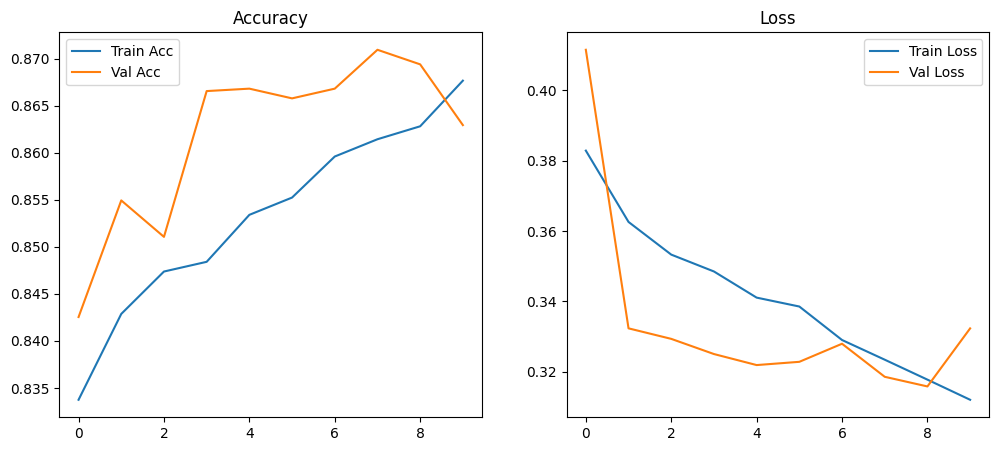

In [34]:
import matplotlib.pyplot as plt

# Assume 'history' is the variable storing model.fit() output
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [35]:
model.save("CancerNet.h5")  # Save to file
print("✅ Model saved as CancerNet.h5")


✅ Model saved as CancerNet.h5
